In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pylab import rcParams  #figure size in inches

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# add plots to Jupyter notebook
%matplotlib inline   

In [2]:
apps= pd.read_csv('../../capstone two/googleplaystore.csv')  # open file in the up-level folder
review= pd.read_csv('../../capstone two/googleplaystore_user_reviews.csv')

print(apps.info())
print(apps.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  

<h2>Basic ETA<h2>

<h3>Data Cleaning<h3>

In [3]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [4]:
# shifted row in 10472, drop single row by index
apps.iloc[10470:10475, :]

apps.drop([10472],inplace=True)  #  inplace=True
apps.iloc[10470:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [5]:
#  replace 'free', ',' and '+', convert str to numeric value, new column--Installs_num
apps['Installs']= apps.Installs.str.replace('Free','') 
apps['Installs']= apps.Installs.str.replace('+', '')
apps['Installs']= apps.Installs.str.replace(',', '')

apps['Installs_num']= pd.to_numeric(apps['Installs'])
apps['Installs_num'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [6]:

apps['Category'] = apps.Category.str.replace('1.9','')
apps['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<h3>Most popular category (Installs)<h3>

In [7]:
df=apps[['Category','Installs_num']].groupby(['Category'], as_index=False).sum()

df
# df['Installs_num'].sort_values`(ascending=False)
df.head()

,Category,Installs_num
0,ART_AND_DESIGN,124338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1921469576
4,BUSINESS,1001914865


Text(0.5, 1.0, 'Downloads of apps in each category')

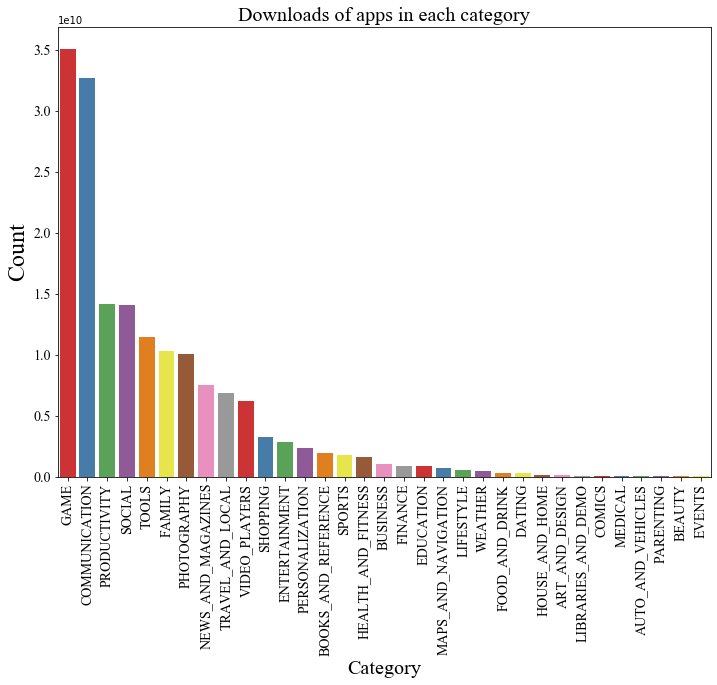

In [8]:
rcParams['figure.figsize']= 11.7,8.27
fig,ax=plt.subplots()
# plt.figure(figsize = (10,10))
# _=sns.barplot(x='Category',y='Installs_num', data=df,palette='Set1')

_=sns.barplot(x='Category',y='Installs_num', data=df, order= df.sort_values('Installs_num',ascending=False).Category,palette='Set1')

csfont={'fontname':'Times New Roman'}  # FONT TYPE
plt.xticks(rotation=90,size=14,**csfont)
plt.yticks(size=14,**csfont)
plt.ylabel('Count',size=24,**csfont)
plt.xlabel('Category',size =20,**csfont)
plt.title('Downloads of apps in each category',size = 20,**csfont)

<strong>Finding<strong>

    The most popular category is game. 
    

 <h3>Largest size<h3>

In [9]:
apps['Size'].unique()
df=apps[apps['Size']!='Varies with device']
df['Size'].unique()
df['Size'] = df.Size.str.replace('k', '')
df['Size'] = df.Size.str.replace('M', 'e+3')
df['Size'] = df.Size.str.replace('+', '').str.replace(',', '').astype('float')
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03,
       4.60e+03, 9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03,
       1.50e+04, 1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03,
       5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03,
       5.70e+03, 8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03, 8.20e+03,
       9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04,
       7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03, 7.20e+03,
       2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e+04, 2.30e

In [10]:
df['Size'].sort_values()
df['Size'].max()

100000.0

In [11]:
largest_apps=list(df[df['Size']==100000000.0].App)
largest_apps.sort()
largest_apps

[]

Text(0.5, 1.0, 'Distribution of size')

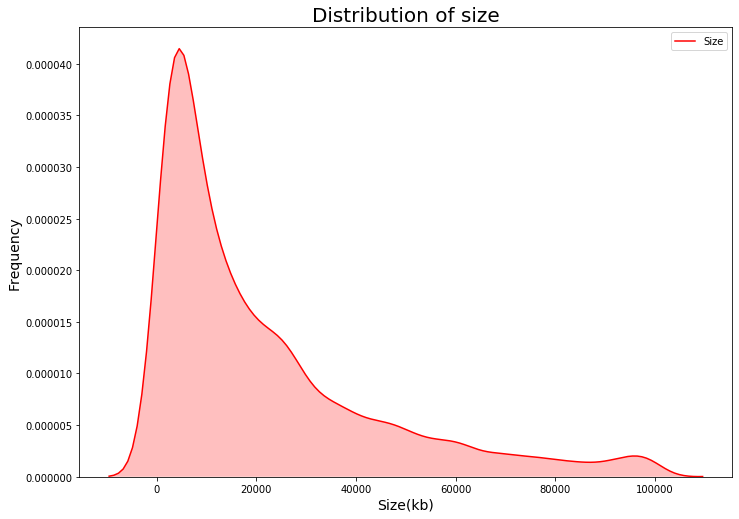

In [12]:
# size distibution 
rcParams['figure.figsize'] = 11.7,8.27
_ = sns.kdeplot(df.Size, color="Red", shade = True)
_.set_xlabel("Size(kb)",size = 14)
_.set_ylabel("Frequency",size = 14)
plt.title('Distribution of size',size = 20)

<strong>Apps that haven't been updated more than 10 year<strong>

In [13]:
apps['date_start']= pd.to_datetime(apps['Last Updated'])
apps['curr_time'] = pd.to_datetime('now')

apps['date_diff']= apps['curr_time']-apps['date_start']
apps['days']=apps['date_diff'].dt.days.astype('int')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,date_start,curr_time,date_diff,days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000,2018-01-07,2020-10-18 19:17:14.206565,1015 days 19:17:14.206565,1015
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000,2018-01-15,2020-10-18 19:17:14.206565,1007 days 19:17:14.206565,1007
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000,2018-08-01,2020-10-18 19:17:14.206565,809 days 19:17:14.206565,809
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000,2018-06-08,2020-10-18 19:17:14.206565,863 days 19:17:14.206565,863
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000,2018-06-20,2020-10-18 19:17:14.206565,851 days 19:17:14.206565,851


In [14]:
apps[apps['days']>3650]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,date_start,curr_time,date_diff,days
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0,Everyone,Entertainment,"May 21, 2010",3.1,1.5 and up,100000,2010-05-21,2020-10-18 19:17:14.206565,3803 days 19:17:14.206565,3803


<strong>Finding<strong>

    One app hasn't been updated more than 10 years.

<h3> Which apps have most daily downloads?<h3>
        Average Installs per day

In [15]:
apps['Daily_Installs'] = apps['Installs'].astype('int')/apps['days'].astype('int')
# apps.sample(10)

apps.nlargest(10,'Daily_Installs').App

2808              Google Photos
2853              Google Photos
2884              Google Photos
3127         Google Street View
3232         Google Street View
3454               Google Drive
3523               Google Drive
3565               Google Drive
3687    Google Play Movies & TV
152           Google Play Books
Name: App, dtype: object

Text(0.5, 1.0, 'Average daily downloads')

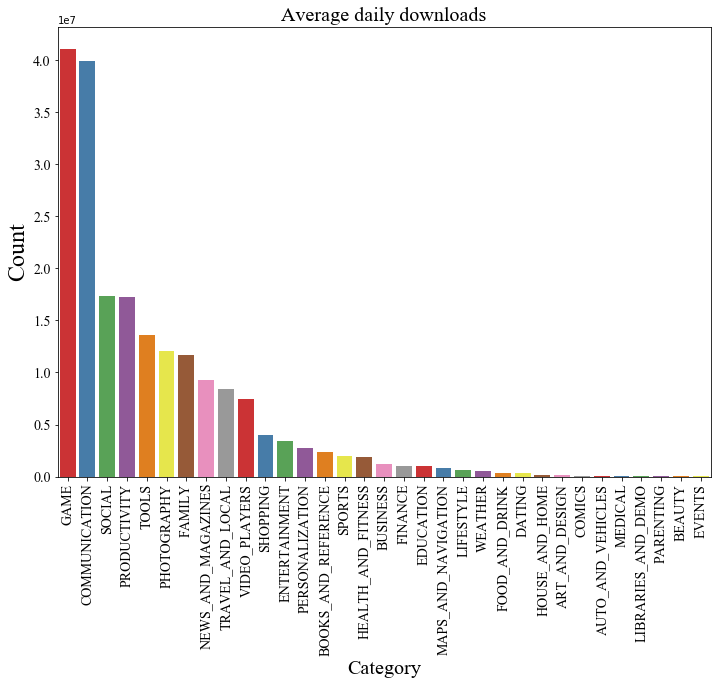

In [16]:
df=apps[['Category','Daily_Installs']].groupby(['Category'], as_index=False).sum()
_=sns.barplot(x='Category',y='Daily_Installs', data=df, order= df.sort_values('Daily_Installs',ascending=False).Category,palette='Set1')

csfont={'fontname':'Times New Roman'}  # FONT TYPE
plt.xticks(rotation=90,size=14,**csfont)
plt.yticks(size=14,**csfont)
plt.ylabel('Count',size=24,**csfont)
plt.xlabel('Category',size =20,**csfont)
plt.title('Average daily downloads',size = 20,**csfont)

<h3>Best Rated apps<h3>

In [17]:
apps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Text(0, 0.5, 'Rating')

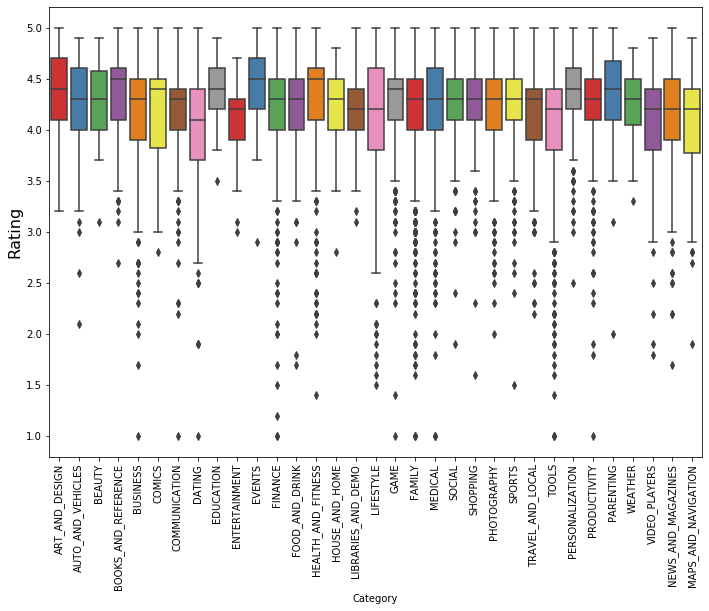

In [18]:
# rating  in each category
fig,ax=plt.subplots()
ax= sns.boxplot(x='Category', y='Rating', data=apps, palette = "Set1") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('Rating',size=16)

In [19]:
apps['Rating'].max()
apps[apps['Rating']==5.0].App.count()

274

In [20]:
# pandas.Series.value_counts to dataframe
best = apps[apps['Rating']==5.0].Category.value_counts().rename_axis('Category').reset_index(name='counts')

best.head()

,Category,counts
0,FAMILY,67
1,LIFESTYLE,29
2,MEDICAL,28
3,BUSINESS,18
4,TOOLS,17


In [21]:
# rcParams['figure.figsize']= 11.7,8.27
# fig,ax=plt.subplots()

# _=sns.barplot(x='Category',y='counts'
#               , data=best, palette='Set1')
# csfont={'fontname':'Times New Roman'}  # FONT TYPE
# plt.xticks(rotation=90,size=14,**csfont)
# plt.yticks(size=14,**csfont)
# plt.ylabel('Count',size=24,**csfont)
# plt.xlabel('Category',size =20,**csfont)
# plt.title('Count of apps in each category(Best rated)',size = 20,**csfont)

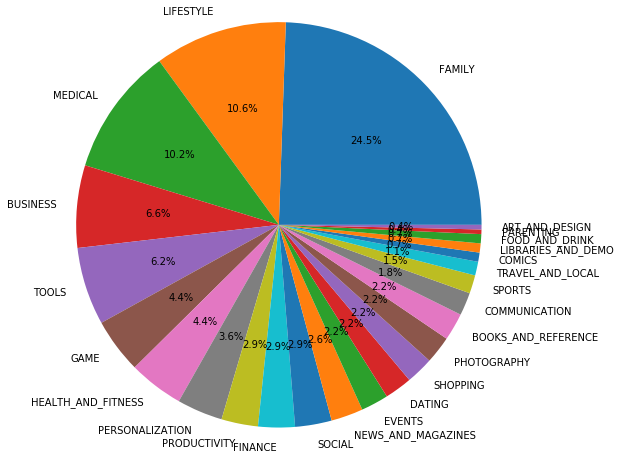

In [22]:
import random 
from matplotlib import cm
rcParams['figure.figsize']= 8,8
fig1, ax1 = plt.subplots()
ax1.pie(best.counts,  labels=best.Category,autopct='%1.1f%%' )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<h2>Correlations<h2>
    
    Rating vs  Reviews, Installs, Size, Price

In [23]:
apps= pd.read_csv('../../capstone two/googleplaystore.csv') 
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
# find missing data, export as new table
null_data=apps.isnull().sum().sort_values(ascending=False)

In [25]:
#  drop data  pandas.dropna-- important function 
apps.dropna(how='any',inplace=True)
apps.shape


(9360, 13)

In [26]:
apps['Installs']= apps.Installs.str.replace('+', '').str.replace(',','').astype('int')
apps['Size']= apps.Size.str.replace('Varies with device', 'NaN')\
    .str.replace('k', '').str.replace('M', 'e+3').astype('float')
apps['Price']=apps.Price.str.replace('$','').astype('float')
apps['Reviews'] = apps.Reviews.astype('int')


In [27]:
apps.sample(100)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6276,Oracle BI Mobile,BUSINESS,4.0,282,7700.0,10000,Free,0.00,Everyone,Business,"August 1, 2018",20.0.0.0,6.0 and up
1392,Calorie Counter - MyNetDiary,HEALTH_AND_FITNESS,4.5,27439,19000.0,1000000,Free,0.00,Everyone,Health & Fitness,"July 16, 2018",6.5.1,5.0 and up
1445,Daily Yoga - Yoga Fitness Plans,HEALTH_AND_FITNESS,4.4,70769,35000.0,5000000,Free,0.00,Everyone,Health & Fitness,"July 24, 2018",6.2.73,4.0 and up
7879,I AM C.T.,HEALTH_AND_FITNESS,4.6,28,20000.0,1000,Free,0.00,Mature 17+,Health & Fitness,"April 27, 2017",1.0,4.0.3 and up
7911,Tropical Financial CU,FINANCE,4.6,1231,14000.0,10000,Free,0.00,Everyone,Finance,"June 12, 2018",5.9.1.0,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,Alif Ba Ta Song - Arabic Kids,FAMILY,4.5,227,15000.0,50000,Free,0.00,Everyone,Educational;Education,"February 24, 2018",1.0,2.3 and up
6220,B&H Photo Video Pro Audio,SHOPPING,4.6,17180,31000.0,1000000,Free,0.00,Everyone,Shopping,"August 3, 2018",5.3.1,4.4 and up
8015,"FXNOW: Movies, Shows & Live TV",FAMILY,3.9,31552,NaN,1000000,Free,0.00,Teen,Entertainment,"July 23, 2018",Varies with device,4.4 and up
1052,KTB Netbank,FINANCE,3.8,42644,19000.0,5000000,Free,0.00,Everyone,Finance,"June 28, 2018",8.18,4.2 and up


In [28]:
apps['Installs_log']= np.log(apps['Installs'])
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


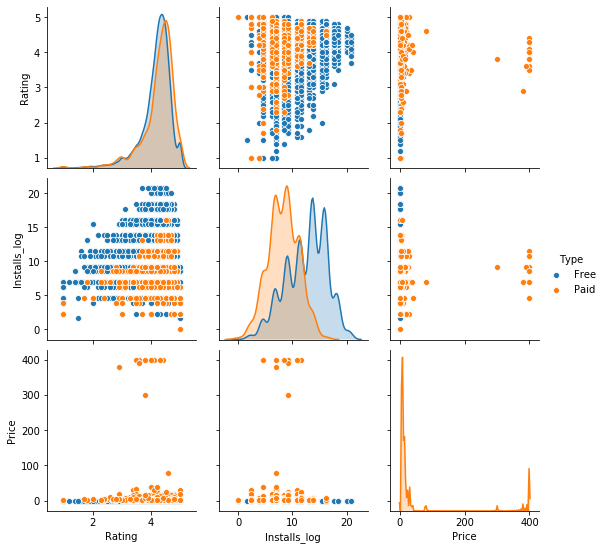

In [29]:
# Rating vs   Installs (log) and Price
df=apps[['Rating', 'Installs_log','Price', 'Type']]
_= sns.pairplot(df, hue='Type')
plt.show()

<strong>Seems that the most popular(high installs number) apps have good ratings<strong>

<!-- x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2") -->

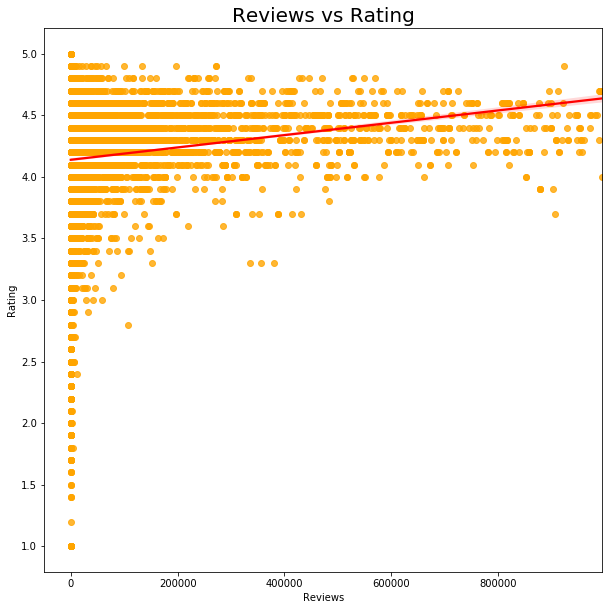

In [30]:
#Reviews vs rating

# plt.figure(figsize = (10,10))
# sns.jointplot(x='Reviews', y='Rating',color = 'orange', data=apps)
# plt.show()

# Red line shows a positive relationship between Reviews and Rating
plt.figure(figsize = (10,10))
_= sns.regplot(x="Reviews", y="Rating", data=apps[apps['Reviews'] <1000000],scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.title('Reviews vs Rating',size=20)
plt.show()

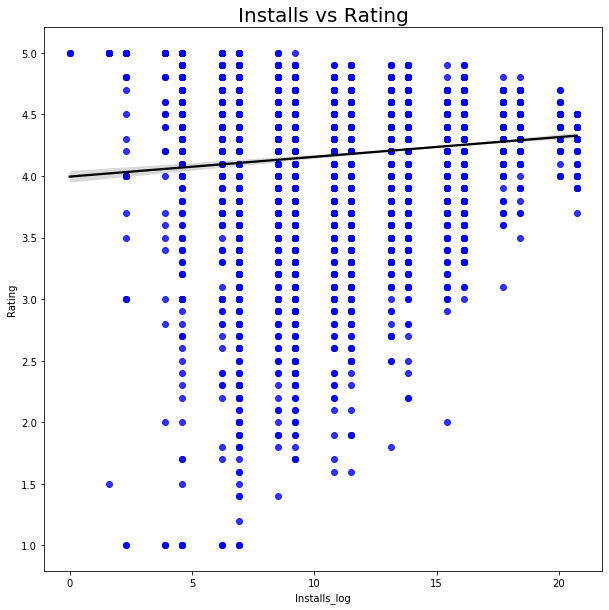

In [31]:
# Installs(log) vs rating
plt.figure(figsize = (10,10))
_= sns.regplot(x="Installs_log", y="Rating", data=apps, scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.title('Installs vs Rating',size=20)
plt.show()

In [50]:
 # Price vs rating
apps['PriceRange'] = apps['Price']    
apps.loc[ apps['Price'] == 0,'PriceRange'] = 'Free'
apps.loc[ (apps['Price'] > 0) & (apps['Price'] <=0.99),'PriceRange'] = '0.00 ~ 0.99'
apps.loc[ (apps['Price'] > 0.99) & (apps['Price'] <=4.99),'PriceRange'] = '1.00~ 4.99'
apps.loc[ (apps['Price'] > 4.99) & (apps['Price'] <=9.99),'PriceRange'] = '5.00 ~ 9.99'
apps.loc[ (apps['Price'] > 9.99) & (apps['Price'] <=19.99),'PriceRange'] = '10.00 ~ 19.99'
apps.loc[ (apps['Price'] > 19.99) & (apps['Price'] <=49.99),'PriceRange'] = '20.00 ~ 49.99'
apps.loc[ (apps['Price'] > 49.99),'PriceRange'] = '50.00 ~ '


Text(0.5, 1, 'Price VS Rating')

<Figure size 720x720 with 0 Axes>

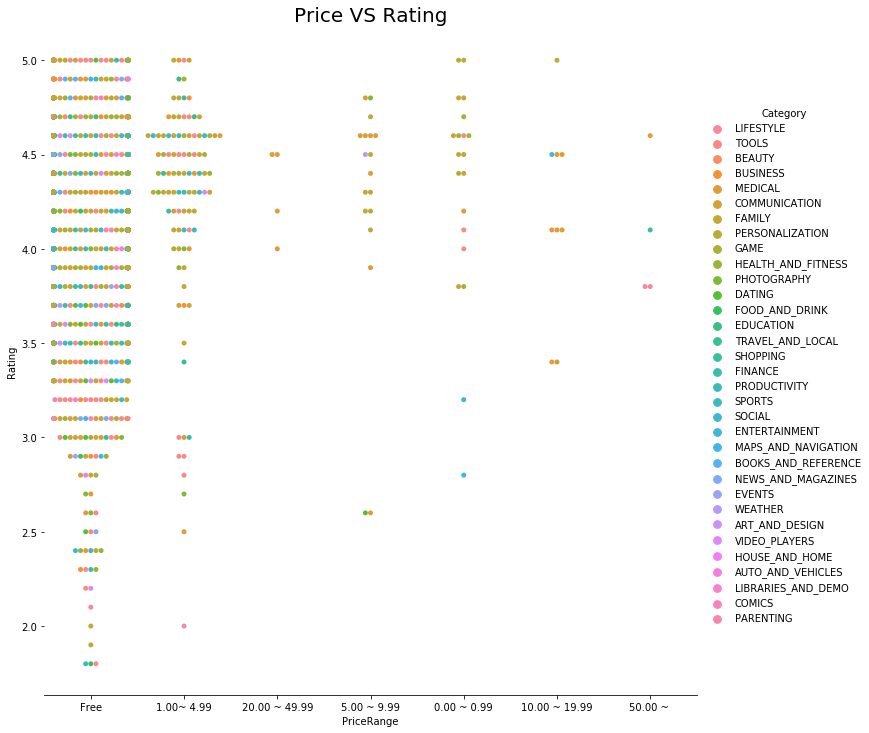

In [78]:
plt.figure(figsize = (10,10))
df = apps[['PriceRange','Rating','Category']].sample(2000)
# _ = sns.swarmplot(x='PriceRange', y='Rating',hue='Category', data=df)
_= sns.catplot(x="PriceRange", y="Rating", hue='Category',kind="swarm", data=df,size = 10)
_.despine(left=True)
# plt.xticks( ['0.00 ~ 0.99','1.00~ 4.99','5.00 ~ 9.99','10.00 ~ 19.99','20.00 ~ 49.99'], rotation=90)
# plt.xticks()
plt.title('Price VS Rating',size = 20)

Text(0.5, 1.0, 'Installs VS Content Rating')

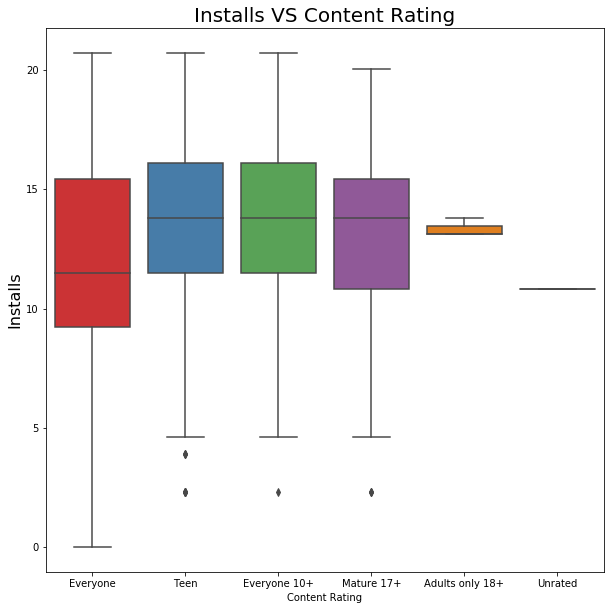

In [124]:
# Installs vs  content
plt.figure(figsize = (10,10))
_= sns.boxplot(x='Content Rating', y='Installs_log', data=apps, palette = "Set1") 
# _.set_xticklabels(rotation=90)
plt.ylabel('Installs',size=16)
# plt.ylim([0,11000000])
plt.title('Installs VS Content Rating',size = 20)

# Insights

### 1. The most popular category is game, with most downloads and installs.
### 2. Old apps: One app hasn't been updated more than 10 years.
### 3. Correlation analysis reveals that review numbers and installs are positivelyy related to rating, but not price.  
 